In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 음성(speech): 사람의 언어가 들어 있는 소리  
# 오디오(audio): 사람 목소리 이외의 모든 소리를 통칭해서 일컬음. 생활소리, 동물울음소리, 클래식, 악기소리 등  
  
# 음성의 경우 일정한 주파수 영역에만 해당하기 때문에 일반적인 소리보다 처리하기가 수월  
  
# 소리: 진동으로 인한 공기의 압축  
# 파동: 압축이 얼마나 됐는지를 말함  
  
# 소리에서 얻을 수 있는 물리량의 3요소  
#     - 진폭(Amplitude)   : 소리의 세기(크기)가 달라짐  
#     - 주파수(Frequency) : 소리의 높이 달라짐  
#     - 위상(Phase)
  
  
# - 물리적 음향
#     - Intensity(강도)를 진폭의 세기로 정의
#     - Frequency는 떨림의 빠르기로 정의
#     - Tone-Color는 파동의 모양으로 정의
# - 심리적 음향
#     - Loudness: 소리의 크기를 말함
#     - Pitch : 음정, 소리의 높낮이, 진동수를 의미
#     - Timbre : 음색, 소리, 감각 등을 나타냄
  
  
# 주파수(the number of compression): 1초 동안의 진동 횟수 (단위: Hz - 1Hz는 1초에 한 번 진동한다는 것을 의미)  
# 주기(period): 파동이 한 번 진동하는데 걸리는 시간 또는 그 길이  
  
  
# 복합파: 서로 다른 주파수를 가진 수많은 소리가 뒤섞여 만들어진다. 우리가 사용하는 대부분의 소리가 이에 해당. 서로 다른 정현파(sine wave)들의 합으로 이루어진 파형  


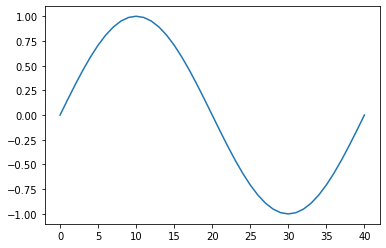

In [6]:
## 아날로그 신호의 표본화(ampling)

# 1사이클 동안 나타나는 연속 시간 연속 크기 아날로그 신호인 간단한 사인함수 그려보기
# 표본화(Sampling): 시간축 방향에서 일정 간격으로 샘플을 추출하여 이산 신호(discrete signal)로 변환시키는 과정

import numpy as np
import matplotlib.pyplot as plt

# sampling_rate: 초당 샘플링의 횟수(샘플링: 1초의 연속적인 신호를 몇 개의 숫자로 나누어 표현할 것인지)
# 16kHz는 보통 Speech에서 많이 사용되는 주파수 영역대 / 44.1kHz는 Music에서 많이 사용하는 주파수영역대
# 음성데이터를 사용할 것이므로 sampling_rate를 16000(16k)으로 지정
# duration: 지속시간(초 단위)
def single_tone(frequecy, sampling_rate=16000, duration=1):
    t = np.linspace(0, duration, int(sampling_rate))
    y = np.sin(2 * np.pi * frequecy * t)
    return y

y = single_tone(400)    # 주파수(Hz: 주기가 일정하게 반복되는 횟수)

plt.plot(y[:41])
plt.show()

In [7]:
y[3]

0.4540167434911468

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


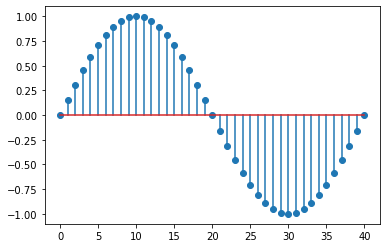

In [8]:
# 1사이클 동안 나타나는 이산시간 연속크기 신호 출력
plt.stem(y[:41])
plt.show()

In [9]:
# 연속적인 아날로그 신호를 컴퓨터 입력으로 넣게 되면  
# 표본화(Sampling), 양자화(Quantizing), 부호화(Encoding)을 거쳐  
# 이진 디지털 신호(Binary Digital Signal)로 변화시켜 인식  
  
# 아날로그 데이터에서 일정 간격으로 표본을 채취하는 방식으로 이산적 데이터를 구한다.  
# 이산적 데이터 값이 소수점 아래로 무한히 정밀해질 수 없어서 일정 간격으로 값을 근사하여 구할 수밖에 없는데, 이 과정이 양자화  
# 이 과정에서 원본 데이터와 차이가 발생. Sampling_rate가 클수록 기대 왜곡치가 작아져 원본에 가까운 형태로 변환 
  
# 부호화 통해 표본화와 양자화를 거친 원본 아날로그 수치가 최종적인 디지털 표현을 얻게 된다.(0, 1)

In [10]:
# 음성인식 모델을 위한 학습데이터 다운로드
# 리눅스 가상환경에서 진행
# $ mkdir -p ~/aiffel/speech_recognition/data
# $ mkdir -p ~/aiffel/speech_recognition/models
# $ wget https://aiffelstaticdev.blob.core.windows.net/dataset/speech_wav_8000.npz -P ~/aiffel/speech_recognition/data

In [11]:
# waveform 형태의 데이터
# - Audio 데이터는 이미지 데이터보다 낮은 차원의 데이터를 다룸
# - 1개의 wav 파일은 1차원으로 이루어진 시계열 데이터
# - 여러 소리 파형이 합쳐진 복합파

# 간단한 단어 인식을 위한 훈련데이터셋
# - 짧은 단어의 라벨이 달려 있어, 음성들을 텍스트로 구분하는 모델 혹은 간단한 명령어를 구별하는 모델로도 학습 가능

# Bits per sample
# - 샘플 하나마다 소리의 세기를 몇 비트로 저장했는지 나타냄
# - 값이 커질수록 세기를 정확하게 저장할 수 있다.
# - 4 bits / 8 bits unsigned int / 16 bits int / 24 bits / 32 bits float 등의 자료형으로 표현

# Sampling frequency
# - 샘플링 주파수: 소리로부터 초당 샘플링한 횟수 의미
# - 원래 신호를 다시 복원할 수 있는 나이퀴스트(Nyquist) 샘플링 룰에 따라 복원해야 할 신호 주파수의 2배 이상으로 샘플링 해야 함
# - 가청 주파수(20 ~ 24 kHz)를 복원하기 위해 사용. 음원에서는 44.1kHz를 많이 이용

# Channel
# - 각 채널별로 샘플링된 데이터 따로 저장
# - 2채널(Stereo) 음원 재생시 왼쪽과 오른쪽 스피커에 다른 값 출력
# - 1채널(Mono) 음원의 경우 왼쪽 데이터만 있고, 재생시에 오른쪽 스피커에도 같은 값이 출력

In [12]:
import numpy as np
import os

# 다운받은 데이터 파일을 data_path 변수에 불러온다.
data_path = '/content/drive/MyDrive/aiffel/speech_recognition/data/speech_wav_8000.npz'
speech_data = np.load(data_path)
print("✅")

# 1000Hz 신호를 저장한 wav 파일
# Sample rate는 48000Hz, 즉 1초 재생하는데 필요한 Sample의 수가 48000개
# 모든 샘플은 -1 ~ 1 사이의 정해진 bits per sample의 값으로 표현됨

✅


In [13]:
## 데이터셋 살펴보기

# npz파일로 이뤄진 데이터 - 각각 데이터는 wav_vals, label_vals로 저장되어 있음
print("Wave data shape : ", speech_data["wav_vals"].shape)
print("Label data shape : ", speech_data["label_vals"].shape)
print("✅")

# Wave data shape :  (50620, 8000)
# Label data shape :  (50620, 1)

# 데이터셋은 1초 길이의 오디오 음성데이터 50620개로 이루어짐
# 원래 Sample rate는 16000이지만 8000으로 re-sampling하여 사용
# 모두 1초의 길이를 가지는 오디오 음성데이터여서 각각 8000개의 sample data를 가짐

Wave data shape :  (50620, 8000)
Label data shape :  (50620, 1)
✅


In [14]:
import IPython.display as ipd
import random

# 데이터 선택(랜덤하게 선택)
rand = random.randint(0, len(speech_data["wav_vals"]))
print("rand num : ", rand)

sr = 8000 # 1초동안 재생되는 샘플의 개수

data = speech_data["wav_vals"][rand]

print("Wave data shape : ", data.shape)
print("label : ", speech_data["label_vals"][rand])

ipd.Audio(data, rate=sr)


rand num :  31598
Wave data shape :  (8000,)
label :  ['off']


In [15]:
## train/test 데이터셋 구성하기

# 현재 단어의 정답은 Text형태 - 학습 위해서 Text데이터를 학습가능한 형태로 만들어줘야 한다.

# 구분해야 할 label 목록 / 이외의 데이터는 unknown, silence로 분류
target_list = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go']
label_value = target_list
label_value.append('unknown')
label_value.append('silence')
print('LABEL : ', label_value)

new_label_value = dict()

# enumerate(): 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 돌려줌
for i, l in enumerate(label_value):  # 인덱스와 자료형을 차례로 입력받음
    new_label_value[l] = i           # Text로 이루어진 라벨 데이터를 학습에 사용하기 위해서 index 형태로 바꿔주는 작업

label_value = new_label_value        # int로 이뤄진 index 작업을 통해서 Label data를 더 쉽게 사용

print('Indexed LABEL : ', new_label_value)


LABEL :  ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'unknown', 'silence']
Indexed LABEL :  {'yes': 0, 'no': 1, 'up': 2, 'down': 3, 'left': 4, 'right': 5, 'on': 6, 'off': 7, 'stop': 8, 'go': 9, 'unknown': 10, 'silence': 11}


In [16]:
temp = []

for v in speech_data["label_vals"]:
    temp.append(label_value[v[0]])
    
label_data = np.array(temp)
print(label_data)


[ 3  3  3 ... 11 11 11]


In [17]:
## 학습을 위한 데이터 분리

# train data와 test data 분리
from sklearn.model_selection import train_test_split

sr = 8000    # 1초동안 재생되는 샘플의 개수
train_wav, test_wav, train_label, test_label = train_test_split(speech_data["wav_vals"],
                                                                label_data,
                                                                test_size=0.1,    # 10% 만큼 테스트 데이터 할당
                                                                shuffle=True)    # 무작위로 섞기
print(train_wav)

train_wav = train_wav.reshape([-1, sr, 1]) # add channel for CNN
test_wav = test_wav.reshape([-1, sr, 1])
print("✅")

[[ 2.3893654e-02  3.8138472e-02  3.2652784e-02 ... -3.4015860e-02
  -3.2277159e-02 -3.6093183e-02]
 [-3.7446758e-04 -2.7851015e-04 -1.4112276e-03 ... -2.9070193e-03
  -3.2837752e-03 -8.6138323e-03]
 [-4.4176815e-04 -4.5875594e-04 -3.3623708e-04 ...  1.1590600e-03
   5.2339269e-04  4.3863003e-04]
 ...
 [-1.0514621e-05 -6.5285852e-04 -1.1425446e-03 ...  2.6435518e-01
   2.4870704e-01  2.4470119e-01]
 [ 6.9498463e-04  2.1602039e-03  1.9095092e-03 ... -3.0361325e-03
  -2.9052154e-03 -3.1814424e-03]
 [ 6.4253720e-04  4.2773322e-03  7.7758790e-03 ...  2.0539777e-03
  -4.9184263e-03  7.5885857e-04]]
✅


In [18]:
# 나눠진 데이터셋 확인
print("train data : ", train_wav.shape)
print("train labels : ", train_label.shape)
print("test data : ", test_wav.shape)
print("test labels : ", test_label.shape)
print("✅")


train data :  (45558, 8000, 1)
train labels :  (45558,)
test data :  (5062, 8000, 1)
test labels :  (5062,)
✅


In [19]:
## 학습을 위한 하이퍼파라미터 설정

batch_size = 32
max_epochs = 10

# the save point
checkpoint_dir = '/content/drive/MyDrive'+'/aiffel/speech_recognition/models/wav'

print(checkpoint_dir)


/content/drive/MyDrive/aiffel/speech_recognition/models/wav


In [20]:
## Data setting

# tf.data.Dataset을 이용하여 데이터셋 구성하기
# 해당 패키지는 전처리, 배치처리 등을 쉽게 할 수 있게 한다.

def one_hot_label(wav, label):
    label = tf.one_hot(label, depth=12)
    return wav, label
print("✅")

✅


In [21]:
import tensorflow as tf

# tf.data.Dataset.from_tensor_slices() 함수에 return 받기 원하는 데이터를 
# 튜플(data, label) 형태로 넣어서 사용할 수 있다.

# map() 함수: dataset이 데이터를 불러올 때마다 동작시킬 데이터 전처리 함수를 매핑하는 역할
# map 함수는 중첩해서 사용 가능

# batch: dataset에서 제공하는 튜플 형태의 데이터를 얼마나 가져올지 결정

# for train
train_dataset = tf.data.Dataset.from_tensor_slices((train_wav, train_label))
train_dataset = train_dataset.map(one_hot_label)
train_dataset = train_dataset.repeat().batch(batch_size=batch_size)
print(train_dataset)
# for test
test_dataset = tf.data.Dataset.from_tensor_slices((test_wav, test_label))
test_dataset = test_dataset.map(one_hot_label)
test_dataset = test_dataset.batch(batch_size=batch_size)
print(test_dataset)
print("✅")

<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 8000, 1), (None, 12)), types: (tf.float32, tf.float32)>
✅


In [22]:
## Wave classification 모델 구현
# Audio 데이터는 1차원 데이터 - Conv1D layer를 이용하여 모델 구성

from tensorflow.keras import layers

input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav = tf.keras.Model(input_tensor, output_tensor)

model_wav.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 8000, 32)          320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8000, 32)          9248      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4000, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4000, 64)          18496     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 4000, 64)          36928     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2000, 64)          0     

In [23]:
## Loss

# 라벨이 될 수 있는 12개의 단어 클래스 - 구분하기 위해 multi-class classification 필요
# Categrorical Cross-Entropy loss 사용

optimizer=tf.keras.optimizers.Adam(1e-4)    # 최적화 함수
model_wav.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),    # 손실함수
                  optimizer=optimizer,
                  metrics=['accuracy'])
print("✅")

✅


In [24]:
# callback 함수를 이용해서 학습 중간 중간 원하는 동작을 하도록 설정
# 모델 재사용 위해 모델 가중치 저장하는 callback 함수 추가
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,    # 가중치 저장
                                                 monitor='val_loss',        # validation loss 모니터
                                                 mode='auto',
                                                 save_best_only=True,       # loss 개선될 때 저장
                                                 verbose=1)
print("✅")

✅


In [25]:
#30분 내외 소요(메모리 사용량 주의)
history_wav = model_wav.fit(train_dataset, epochs=max_epochs,
                            steps_per_epoch=len(train_wav) // batch_size,
                            validation_data=test_dataset,
                            validation_steps=len(test_wav) // batch_size,
                            callbacks=[cp_callback]
                           )
print("✅")

Epoch 1/10
1423/1423 [==============================] - 239s 144ms/step - loss: 1.8220 - accuracy: 0.3731 - val_loss: 0.9566 - val_accuracy: 0.6930

Epoch 00001: val_loss improved from inf to 0.95657, saving model to /content/drive/MyDrive/aiffel/speech_recognition/models/wav
Epoch 2/10
1423/1423 [==============================] - 208s 146ms/step - loss: 0.8800 - accuracy: 0.7259 - val_loss: 0.6567 - val_accuracy: 0.7909

Epoch 00002: val_loss improved from 0.95657 to 0.65667, saving model to /content/drive/MyDrive/aiffel/speech_recognition/models/wav
Epoch 3/10
1423/1423 [==============================] - 209s 147ms/step - loss: 0.6162 - accuracy: 0.8132 - val_loss: 0.5115 - val_accuracy: 0.8345

Epoch 00003: val_loss improved from 0.65667 to 0.51153, saving model to /content/drive/MyDrive/aiffel/speech_recognition/models/wav
Epoch 4/10
1423/1423 [==============================] - 209s 147ms/step - loss: 0.4410 - accuracy: 0.8704 - val_loss: 0.3955 - val_accuracy: 0.8718

Epoch 00004:

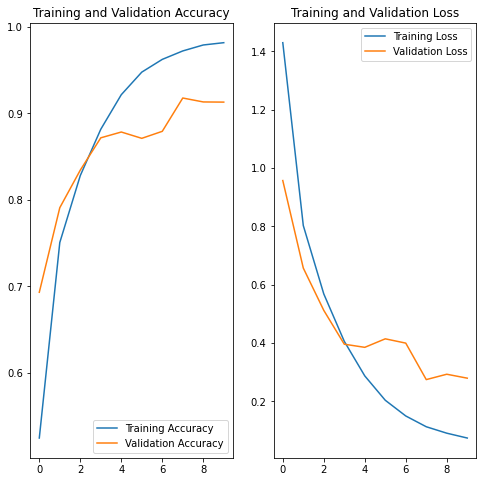

✅


In [26]:
## 학습 결과 Plot

import matplotlib.pyplot as plt

acc = history_wav.history['accuracy']
val_acc = history_wav.history['val_accuracy']

loss=history_wav.history['loss']
val_loss=history_wav.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("✅")

In [27]:
## 평가하기
# test dataset을 애용하여 모델의 성능을 평가

# checkpoint callback 함수가 저장한 weight를 다시 불러오기
model_wav.load_weights(checkpoint_dir)
print("✅")

✅


In [28]:
results = model_wav.evaluate(test_dataset)    # test data 이용하여 평가하기
print("✅")

159/159 [==============================] - 7s 41ms/step - loss: 0.2739 - accuracy: 0.9180
✅


In [29]:
# loss
print("loss value: {:.3f}".format(results[0]))

# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))
print("✅")

loss value: 0.274
accuracy value: 91.8017%
✅


In [30]:
## Model Test

inv_label_value = {v: k for k, v in label_value.items()}    # 딕셔너리 형태로 데이터 받음
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

ipd.Audio(batch_xs.reshape(8000,), rate=8000)

label :  unknown


In [31]:
# 위에서 확인해 본 테스트셋의 라벨과 우리 모델의 실제 prediction 결과 비교

if np.argmax(y_pred_) == batch_ys[0]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Correct!)')
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Incorrect!)')
print("✅")

y_pred: unknown(Correct!)
✅


In [32]:
## Skip-Connection model 추가해보기

# Concat을 이용한 방식으로 구현
input_tensor = layers.Input(shape=(sr, 1))

x = layers.Conv1D(32, 9, padding='same', activation='relu')(input_tensor)
x = layers.Conv1D(32, 9, padding='same', activation='relu')(x)
skip_1 = layers.MaxPool1D()(x)

x = layers.Conv1D(64, 9, padding='same', activation='relu')(skip_1)
x = layers.Conv1D(64, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_1], -1)
skip_2 = layers.MaxPool1D()(x)

x = layers.Conv1D(128, 9, padding='same', activation='relu')(skip_2)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(128, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_2], -1)
skip_3 = layers.MaxPool1D()(x)

x = layers.Conv1D(256, 9, padding='same', activation='relu')(skip_3)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = layers.Conv1D(256, 9, padding='same', activation='relu')(x)
x = tf.concat([x, skip_3], -1)
x = layers.MaxPool1D()(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)

output_tensor = layers.Dense(12)(x)

model_wav_skip = tf.keras.Model(input_tensor, output_tensor)

model_wav_skip.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8000, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_10 (Conv1D)              (None, 8000, 32)     320         input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_11 (Conv1D)              (None, 8000, 32)     9248        conv1d_10[0][0]                  
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 4000, 32)     0           conv1d_11[0][0]                  
____________________________________________________________________________________________

In [33]:
optimizer=tf.keras.optimizers.Adam(1e-4)
model_wav_skip.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                       optimizer=optimizer,
                       metrics=['accuracy'])
print("✅")

✅


In [34]:
# the save point
checkpoint_dir = '/content/drive/MyDrive'+'/aiffel/speech_recognition/models/wav_skip'
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_dir,
                                                 save_weights_only=True,
                                                 monitor='val_loss',
                                                 mode='auto',
                                                 save_best_only=True,
                                                 verbose=1)
print("✅")

✅


In [35]:
# 30분 내외 소요
history_wav_skip = model_wav_skip.fit(train_dataset, epochs=max_epochs,
                                      steps_per_epoch=len(train_wav) // batch_size,
                                      validation_data=test_dataset,
                                      validation_steps=len(test_wav) // batch_size,
                                      callbacks=[cp_callback]
                                     )
print("✅")

Epoch 1/10
1423/1423 [==============================] - 248s 173ms/step - loss: 1.6120 - accuracy: 0.4683 - val_loss: 0.7435 - val_accuracy: 0.7668

Epoch 00001: val_loss improved from inf to 0.74349, saving model to /content/drive/MyDrive/aiffel/speech_recognition/models/wav_skip
Epoch 2/10
1423/1423 [==============================] - 246s 173ms/step - loss: 0.7340 - accuracy: 0.7801 - val_loss: 0.5101 - val_accuracy: 0.8325

Epoch 00002: val_loss improved from 0.74349 to 0.51006, saving model to /content/drive/MyDrive/aiffel/speech_recognition/models/wav_skip
Epoch 3/10
1423/1423 [==============================] - 246s 172ms/step - loss: 0.4285 - accuracy: 0.8808 - val_loss: 0.4248 - val_accuracy: 0.8635

Epoch 00003: val_loss improved from 0.51006 to 0.42478, saving model to /content/drive/MyDrive/aiffel/speech_recognition/models/wav_skip
Epoch 4/10
1423/1423 [==============================] - 245s 172ms/step - loss: 0.2235 - accuracy: 0.9462 - val_loss: 0.3062 - val_accuracy: 0.906

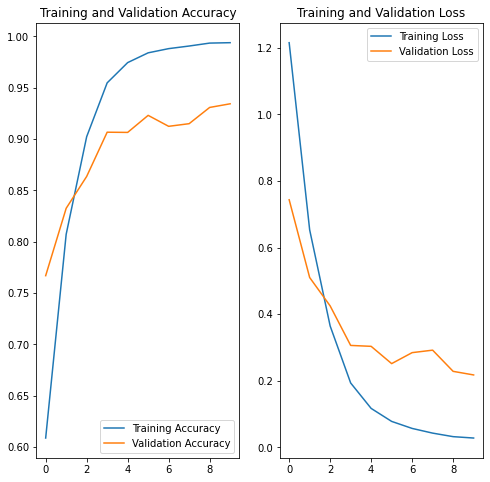

✅


In [36]:
import matplotlib.pyplot as plt

acc = history_wav_skip.history['accuracy']
val_acc = history_wav_skip.history['val_accuracy']

loss=history_wav_skip.history['loss']
val_loss=history_wav_skip.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
print("✅")

In [37]:
# Evaluation

model_wav_skip.load_weights(checkpoint_dir)
results = model_wav_skip.evaluate(test_dataset)

# loss
print("loss value: {:.3f}".format(results[0]))

# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))
print("✅")

159/159 [==============================] - 8s 48ms/step - loss: 0.2173 - accuracy: 0.9344
loss value: 0.217
accuracy value: 93.4413%
✅


In [38]:
# Test

inv_label_value = {v: k for k, v in label_value.items()}
batch_index = np.random.choice(len(test_wav), size=1, replace=False)

batch_xs = test_wav[batch_index]
batch_ys = test_label[batch_index]
y_pred_ = model_wav_skip(batch_xs, training=False)

print("label : ", str(inv_label_value[batch_ys[0]]))

ipd.Audio(batch_xs.reshape(8000,), rate=8000)

label :  stop


In [39]:
if np.argmax(y_pred_) == batch_ys[0]:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Correct!)')
else:
    print("y_pred: " + str(inv_label_value[np.argmax(y_pred_)]) + '(Incorrect!)')
print("✅")

y_pred: stop(Correct!)
✅


✅
Waveform shape :  (8000,)
Spectrogram shape :  (130, 126)


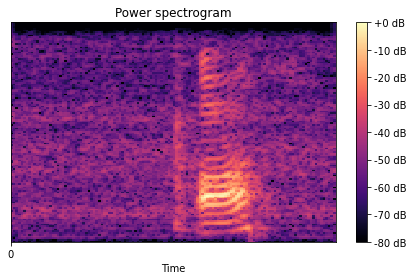

In [40]:
## Spectrogram

# waveform은 실제로는 많은 음원의 파형이 합성된 복합파
# 다양한 파형들을 그 주파수 대역별로 나누어 별도로 해석해야 한다.

# 푸리에 변환(Fourier transform)
# 임의의 입력 신호를 다양한 주파수를 갖는 주기함수(복수 지수함수)들이 합으로 분해하여 표현

# 푸리에 변환이 끝나면 복소수 얻음. 
# 복소수의 절대값은 Spectrum magnitude(주파수의 강도) 
# 복소수가 가지는 phase는 phase spectrum(주파수의 위상)

# STFT(Short Time Fourier Transform)
# FFT는 시간의 흐름에 따라 신호의 주파수 변했을 때, 어느 시간대에 주파수가 변하는지 모름
# STFT는 이를 극복하기 위해서 시간의 길이를 나눠서 푸리에 변환
# STFT의 결과: 시간의 흐름에 따른 frequency 영역별 Amplitude 반환

# Spectrogram: wav 데이터를 해석하는 방법 중 하나
# 일정 시간 동안 wav 데이터 안의 다양한 주파수들이 얼마나 포함되어있는지 보여줌
# STFT는 Spectrogram을 그리는 방법

# X축은 시간, Y축은 주파수
# 음파 강도에 따라 밝은색으로 표현

# FFT 관련 라이브러리 librosa 설치
# $ pip install librosa

import librosa

def wav2spec(wav, fft_size=258):    # spectrogram shape을 맞추기 위해 size 변형
    D = np.abs(librosa.stft(wav, n_fft=fft_size))
    return D
print("✅")

# 위에서 뽑았던 sample data
spec = wav2spec(data)
print("Waveform shape : ", data.shape)
print("Spectrogram shape : ", spec.shape)

import librosa.display

librosa.display.specshow(librosa.amplitude_to_db(spec, ref=np.max), x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xticks(range(0, 1))
plt.tight_layout()
plt.show()